In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
cmap = plt.get_cmap('jet_r')
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit
import folium
import branca
%matplotlib inline

In [2]:
from data_loader import df_countries, df_table, continent_dict
df_latest = df_table[df_table['Date'] == max(df_table['Date'])].reset_index()
df_latest_grouped = df_latest.groupby('Country/Region')[
    'Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

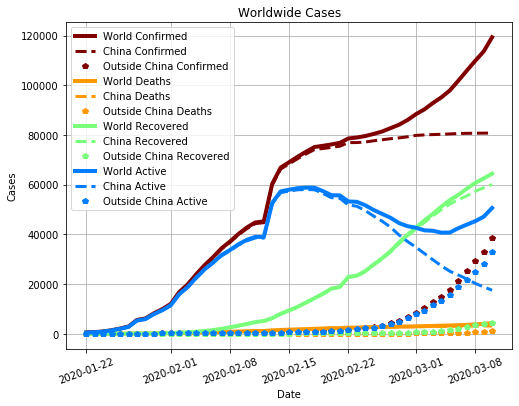

In [96]:
plt.figure(figsize=(8, 6))

cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
country = 'China'
#continent = 'Asia'
for ic, col in enumerate(cols):
    plt.plot(df_table.groupby('Date').sum()[col], '-', 
             c=cmap(np.arange(0, 1, 1./len(cols)))[ic], linewidth=4, label='World '+col)
    plt.plot(df_table[df_table['Country/Region']==country].groupby('Date').sum()[
        col], '--', c=cmap(np.arange(0, 1, 1./len(cols)))[ic], linewidth=3, label=country+' '+col)
    #plt.plot(df_table[df_table['Continent']==continent].groupby('Date').sum()[
    #    col], ':', c=cmap(np.arange(0, 1, 1./len(cols)))[ic], linewidth=3, label=continent+' '+col)
    plt.plot(df_table[df_table['Country/Region']!=country].groupby('Date').sum()[
        col], 'p', c=cmap(np.arange(0, 1, 1./len(cols)))[ic], linewidth=3, label='Outside '+country+' '+col)

plt.title('Worldwide Cases')
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.ylabel('Cases')
plt.grid()
plt.legend()
plt.savefig('../figs/world_cases.png')

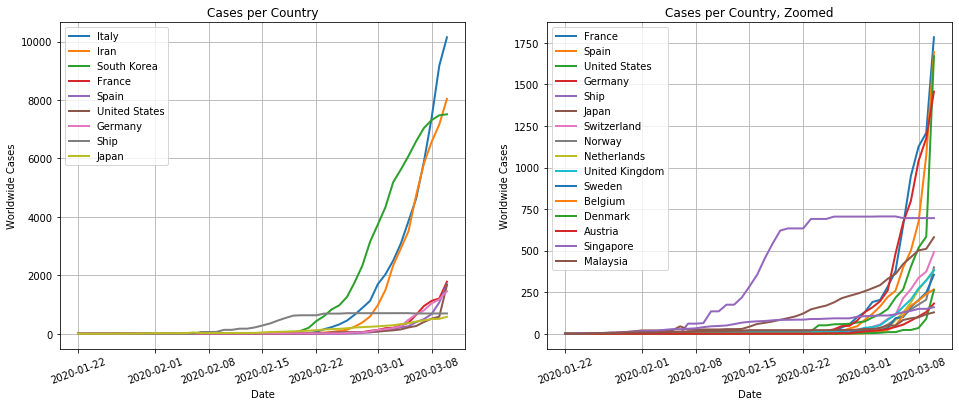

In [103]:
has_states = np.unique(df_table[df_table['Province/State']!='NA']['Country/Region'])
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
countries = df_latest_grouped.sort_values(by='Confirmed', ascending=False)['Country/Region'].values[1:10]
for country in countries:
    df_c = df_table[df_table['Country/Region']==country]
    if country in has_states:
        plt.plot(df_c.groupby('Date').sum()['Confirmed'], label=country, linewidth=2)
    else:
        plt.plot(df_c['Date'], df_c['Confirmed'], label=country, linewidth=2)
plt.title('Cases per Country')
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.ylabel('Worldwide Cases')
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
countries = df_latest_grouped.sort_values(by='Confirmed', ascending=False)['Country/Region'].values[4:20]
for country in countries:
    df_c = df_table[df_table['Country/Region']==country]
    if country in has_states:
        plt.plot(df_c.groupby('Date').sum()['Confirmed'], label=country, linewidth=2)
    else:
        plt.plot(df_c['Date'], df_c['Confirmed'], label=country, linewidth=2)
plt.title('Cases per Country, Zoomed')
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.ylabel('Worldwide Cases')
plt.grid()
plt.legend()

In [ ]:
df_tmp = df_table.groupby(['Country/Region', 'Province/State', 'Date']).agg({
    'Confirmed':'max', 'Deaths':'max', 'Recovered':'max','Lat':'mean', 'Long':'mean'}).groupby(
    ['Country/Region', 'Date']).agg({
    'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum','Lat':'mean', 'Long':'mean'})[['Confirmed']]

In [ ]:
plt.figure(figsize=(8, 6))

cols = ['Confirmed']
country = 'China'
continent = 'Asia'
plt.plot(df_table[df_table['Country/Region']=='Italy'].groupby('Date').sum()[
    col], '-', c=cmap(np.arange(0, 1, 1./3.))[0], linewidth=3, label='Italy'+' '+col)
plt.plot(df_table[df_table['Country/Region']=='Iran'].groupby('Date').sum()[
    col], '-', c=cmap(np.arange(0, 1, 1./3.))[1], linewidth=3, label='Iran'+' '+col)
plt.plot(df_table[df_table['Country/Region']=='South Korea'].groupby('Date').sum()[
    col], '-', c=cmap(np.arange(0, 1, 1./3.))[2], linewidth=3, label='South Korea'+' '+col)
plt.plot(df_ta)


plt.title('World')
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.ylabel('Worldwide Cases')
#plt.yscale('log')
plt.grid()
plt.legend()
plt.savefig('../figs/outside_china_cases.png')

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(100*df_table[['Date', 'Confirmed']][df_table['Country/Region']=='China'].groupby(
    'Date').sum()/df_table[['Date', 'Confirmed']].groupby('Date').sum(), '-b', linewidth=4, label='Confirmed')
plt.plot(100*df_table[['Date', 'Deaths']][df_table['Country/Region']=='China'].groupby(
    'Date').sum()/df_table[['Date', 'Deaths']].groupby('Date').sum(), '-r', linewidth=4, label='Death')
plt.grid()
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.ylabel('China / World percentage')
plt.ylim([70, 101])
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(100*df_table[['Date', 'Confirmed']][df_table['Continent']=='Asia'].groupby(
    'Date').sum()/df_table[['Date', 'Confirmed']].groupby('Date').sum(), '-b', linewidth=4, label='Confirmed')
plt.plot(100*df_table[['Date', 'Deaths']][df_table['Continent']=='Asia'].groupby(
    'Date').sum()/df_table[['Date', 'Deaths']].groupby('Date').sum(), '-r', linewidth=4, label='Death')
plt.grid()
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.ylabel('Asia / World percentage')
plt.ylim([70, 101])
plt.legend()
plt.savefig('../figs/percent_world.png')

In [ ]:
plt.figure(figsize=(8, 6))
n = 4.
plt.plot(df_table[['Date', 'Deaths', 'Confirmed']].groupby('Date').sum().apply(
    lambda x: 100.0-100.0/(1+np.float64(x['Deaths'])/np.float64(x['Confirmed'])), axis=1),
         '-b', linewidth=4, c=cmap(np.arange(0, 1, 1./n))[0], label='World')
plt.plot(df_table[df_table['Country/Region']=='China'][['Date', 'Deaths', 'Confirmed']].groupby('Date').sum().apply(
    lambda x: 100.0-100.0/(1+np.float64(x['Deaths'])/np.float64(x['Confirmed'])), axis=1), 
         '-r', linewidth=4, c=cmap(np.arange(0, 1, 1./n))[1], label='China')
plt.plot(df_table[df_table['Country/Region']=='Italy'][['Date', 'Deaths', 'Confirmed']].groupby('Date').sum().apply(
    lambda x: 100.0-100.0/(1+np.float64(x['Deaths'])/np.float64(x['Confirmed'])), axis=1), 
         '-g', linewidth=4, c=cmap(np.arange(0, 1, 1./n))[2], label='Italy')
#plt.plot(df_table[df_table['Country/Region']=='Iran'][['Date', 'Deaths', 'Confirmed']].groupby('Date').sum().apply(
#    lambda x: 100.0-100.0/(1+np.float64(x['Deaths'])/np.float64(x['Confirmed'])), axis=1), 
#         '-g', linewidth=4, c=cmap(np.arange(0, 1, 1./n))[3], label='Iran')
#plt.plot(df_table[df_table['Country/Region']=='Germany'][['Date', 'Deaths', 'Confirmed']].groupby('Date').sum().apply(
#    lambda x: 100.0-100.0/(1+np.float64(x['Deaths'])/np.float64(x['Confirmed'])), axis=1), 
#         '-g', linewidth=4, c=cmap(np.arange(0, 1, 1./n))[4], label='Germany')
#plt.plot(df_table[df_table['Country/Region']=='United States'][['Date', 'Deaths', 'Confirmed']].groupby('Date').sum().apply(
#    lambda x: 100.0-100.0/(1+np.float64(x['Deaths'])/np.float64(x['Confirmed'])), axis=1), 
#         '-g', linewidth=4, c=cmap(np.arange(0, 1, 1./n))[3], label='United Staets')
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.ylabel('Death Rate [%]')
plt.grid()
plt.ylim([-0,6.0])
plt.legend()
plt.savefig('../figs/death_percentage.png')

In [ ]:
plt.figure(figsize=(8, 6))

cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
country = 'China'
continent = 'Asia'
for ic, col in enumerate(cols):
    plt.plot(df_table.groupby('Date').sum()[col], '-', 
             c=cmap(np.arange(0, 1, 1./len(cols)))[ic], linewidth=4, label='World '+col)
    plt.plot(df_table[df_table['Country/Region']==country].groupby('Date').sum()[
        col], '--', c=cmap(np.arange(0, 1, 1./len(cols)))[ic], linewidth=3, label=country+' '+col)
    plt.plot(df_table[df_table['Continent']==continent].groupby('Date').sum()[
        col], ':', c=cmap(np.arange(0, 1, 1./len(cols)))[ic], linewidth=3, label=continent+' '+col)

plt.title('World')
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.ylabel('Worldwide Cases')
#plt.yscale('log')
plt.grid()
plt.legend()
plt.savefig('../figs/world_cases.png')

In [ ]:
plt.figure(figsize=(8, 6))

c = 'Italy'
cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
t = df_table[df_table['Country/Region']==c][['Date']]
y = df_table[df_table['Country/Region']==c][cols]
litaly = plt.plot(t, y, '-', linewidth=4)

plt.title(c)
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.ylabel('Confirmed Cases')
plt.yscale('log')
plt.grid()
plt.legend(litaly, cols)

In [ ]:
plt.figure(figsize=(8, 6))

c = 'United States'
cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
lus = plt.plot(df_table[df_table['Country/Region']==c].groupby('Date').sum()[
    cols], linewidth=4)

plt.title(c)
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.ylabel('Cases')
plt.yscale('log')
plt.grid()
plt.legend(lus, cols)

In [ ]:
def gt1sick_prob(N, eps):
    return 1.0-np.power((1.0-eps), N)

In [ ]:
plt.figure(figsize=(8, 6))
x = np.arange(0, 0.001, 0.0001/1000)
for i, N in enumerate(np.power(10, range(1, 5))):
    plt.plot(300e6*x, 100.0*gt1sick_prob(N, x), '-', c=cmap(np.arange(0, 1, 1./4.))[i], 
             linewidth=4, label='N='+str(N))
plt.plot(np.array([1e3, 1e3]), np.array([0, 100]), '--r', linewidth=2, label='Currently Infected')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(title="#people around")
plt.xlabel('Population of US infected')
plt.ylabel('% probability of having at least one infected person around')
plt.savefig('../figs/prob_infected.png')

In [ ]:
#temp = df.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
#temp.style.background_gradient(cmap='Pastel1_r')

In [ ]:
#temp = df.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max().groupby(['Country/Region']).sum()
#temp = temp.sort_values(by='Confirmed', ascending=False)
#temp.style.background_gradient(cmap='Pastel1_r')

In [ ]:
#temp = df.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max().groupby(['Country/Region']).sum()
#temp = temp.sort_values(by='Deaths', ascending=False)
#temp.style.background_gradient(cmap='Pastel1_r')

In [ ]:
#temp = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()
#temp.tail(1)

In [ ]:
#df_full = df.groupby(['Country/Region', 'Province/State']).agg({
#    'Confirmed':'max', 'Deaths':'max', 'Recovered':'max','Lat':'mean', 'Long':'mean'})

In [ ]:
r = 100+(np.log10(df_latest['Confirmed']))*2e4
colorscale = branca.colormap.linear.YlOrRd_09.scale(0, np.max(r.values))

In [ ]:
m = folium.Map(location=[0, 0], tiles='Stamen Toner',
               min_zoom=1, max_zoom=10, zoom_start=1)
for i in range(df_latest.shape[0]):
    folium.Circle(location=[df_latest.iloc[i]['Lat'], df_latest.iloc[i]['Long']],
                  radius=r[i], color='red', 
                  tooltip = '<li><bold>Country: ' + df_latest.iloc[i]['Country/Region'] + '</bold</li>' + 
                  '<li><bold>Province: ' + df_latest.iloc[i]['Province/State'] + '</bold</li>' +  
                  '<li><bold>Lat: ' + str(df_latest.iloc[i]['Lat']) + '</bold</li>' +  
                  '<li><bold>Long: ' + str(df_latest.iloc[i]['Long']) + '</bold</li>' +  
                  '<li><bold><font color="red">Confirmed: ' + str(df_latest.iloc[i]['Confirmed']) + '</font></bold</li>' + 
                  '<li><bold>Deaths: ' + str(df_latest.iloc[i]['Deaths']) + '</bold</li>' + 
                  '<li><bold><font color="green">Recovered: ' + str(df_latest.iloc[i]['Recovered']) + '</font></bold</li>',
                  fill_color='red', opacity=1
                 ).add_to(m)
m